In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = keras.preprocessing.image_dataset_from_directory("colon_image_sets/", image_size=(100, 100), batch_size=32)

Found 10000 files belonging to 2 classes.


In [3]:
class_names = dataset.class_names
class_names

['colon_adenocarcinoma', 'colon_benign']

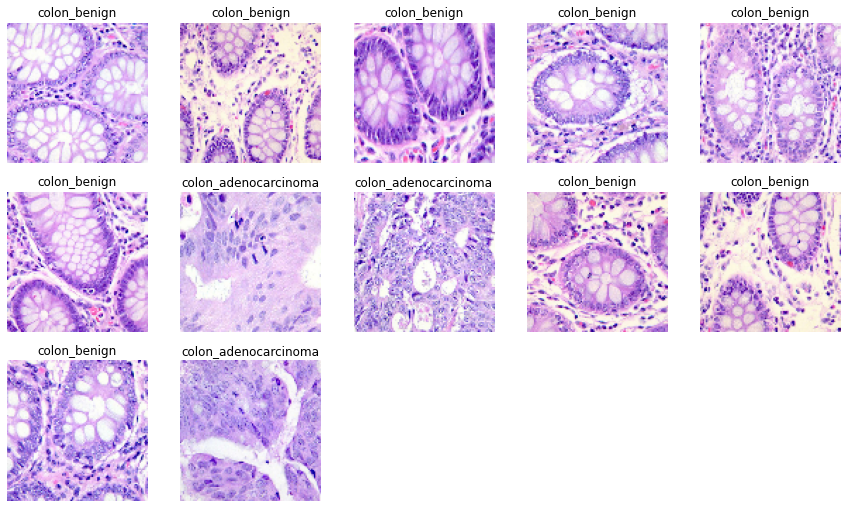

In [4]:
plt.figure(figsize=(15, 15))
for image, label in dataset.take(1):
    for i in range(12):
        plt.subplot(5, 5, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [5]:
def split_dataset(dataset, train_size=0.8):
    l = len(dataset)
    train_df = dataset.take(int(l*train_size))
    rem_df = dataset.skip(int(l*train_size))
    test_df = rem_df.take(int(len(rem_df)*0.5))
    val_df = rem_df.skip(int(len(rem_df)*0.5))
    
    return train_df, test_df, val_df    
    

In [6]:
train_df, test_df, val_df = split_dataset(dataset)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")
])

In [8]:
model.compile(
    optimizer="adam",
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [9]:
model.fit(train_df, validation_data=val_df, epochs=10)

Epoch 1/10
250/250 [==============================] - 106s 423ms/step - loss: 1.0792 - accuracy: 0.5754 - val_loss: 0.5045 - val_accuracy: 0.7401
Epoch 2/10
250/250 [==============================] - 90s 359ms/step - loss: 0.5415 - accuracy: 0.7249 - val_loss: 0.4905 - val_accuracy: 0.7698
Epoch 3/10
250/250 [==============================] - 87s 347ms/step - loss: 0.3372 - accuracy: 0.8530 - val_loss: 0.2953 - val_accuracy: 0.8681
Epoch 4/10
250/250 [==============================] - 92s 366ms/step - loss: 0.2505 - accuracy: 0.8991 - val_loss: 0.3235 - val_accuracy: 0.8452
Epoch 5/10
250/250 [==============================] - 87s 349ms/step - loss: 0.2156 - accuracy: 0.9137 - val_loss: 0.1216 - val_accuracy: 0.9593
Epoch 6/10
250/250 [==============================] - 86s 343ms/step - loss: 0.1736 - accuracy: 0.9325 - val_loss: 0.2350 - val_accuracy: 0.9077
Epoch 7/10
250/250 [==============================] - 85s 341ms/step - loss: 0.1215 - accuracy: 0.9535 - val_loss: 0.1697 - val_a

In [10]:
model.evaluate(test_df)

31/31 [==============================] - 10s 89ms/step - loss: 0.0383 - accuracy: 0.9849


[0.038296665996313095, 0.9848790168762207]

In [11]:
model.save("colon_model_cnn_acc98")

INFO:tensorflow:Assets written to: colon_model_cnn_acc98\assets
